In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [29]:
import librosa
import tensorflow as tf
print(tf.__version__)
import csv
import numpy as np
import matplotlib.pyplot as plt
import nltk
import os
import sys
from IPython.display import Audio

2.2.0


In [0]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import numpy as np
import pandas as pd
import random
import itertools
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [31]:
os.getcwd()

'/content'

In [32]:
x , sr = librosa.load(filepath+'0a7c2a8d_nohash_0.wav',sr =None , mono =True , offset = 0.0 ,duration = None)

len(x) , sr

#where sr==sampling_rate && x==sample

(16000, 16000)

In [33]:
duration = len(x)/sr
duration

1.0

In [34]:
Audio(sound_path)

In [0]:
def load_audio_file(file_path):
    input_length = 16000
    data = librosa.core.load(file_path)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

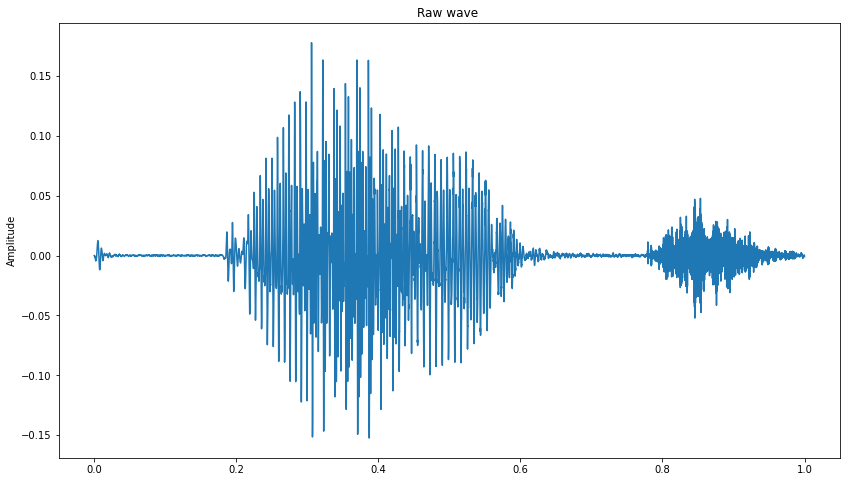

In [36]:
data = load_audio_file(sound_path)
plot_time_series(data)

In [37]:
#Hear it ! 
ipd.Audio(data, rate=16000)

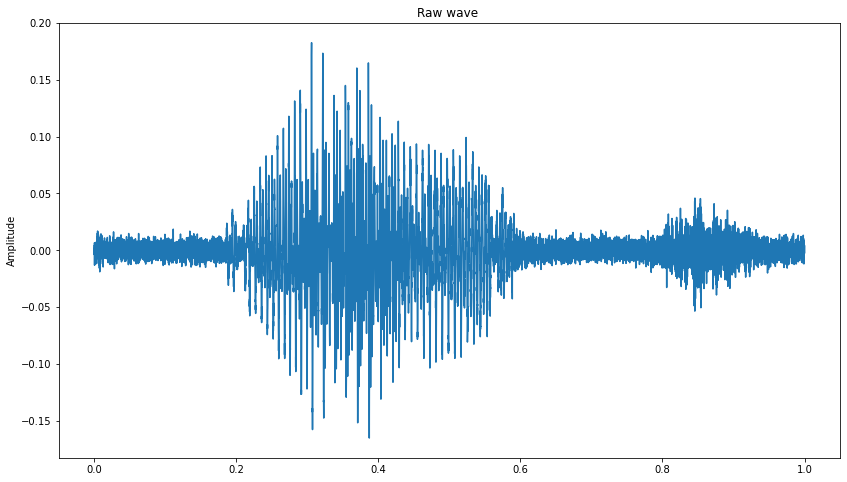

In [38]:
# Adding white noise 
wn = np.random.randn(len(data))
data_wn = data + 0.005*wn
plot_time_series(data_wn)
# We limited the amplitude of the noise so we can still hear the word even with the noise, 
#which is the objective
ipd.Audio(data_wn, rate=16000)

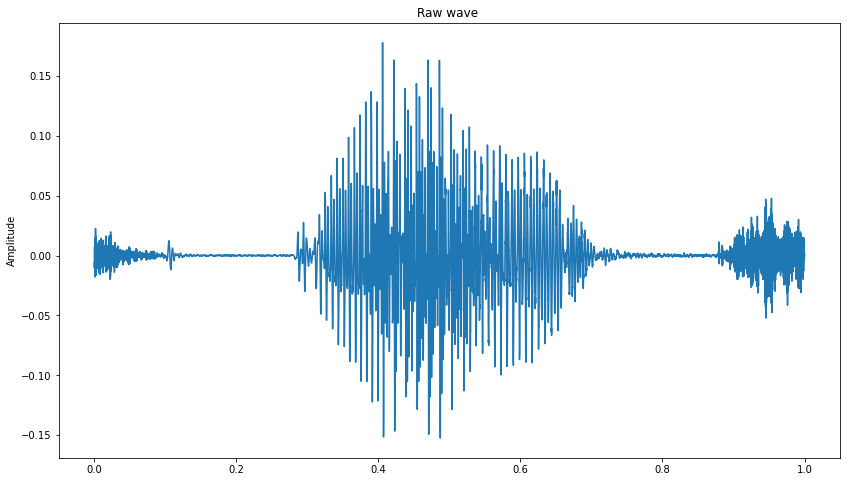

In [42]:
# Shifting the sound
data_roll = np.roll(data, 1600)
plot_time_series(data_roll)
ipd.Audio(data_roll, rate=16000)

This makes the sound deeper but we can still hear the word 


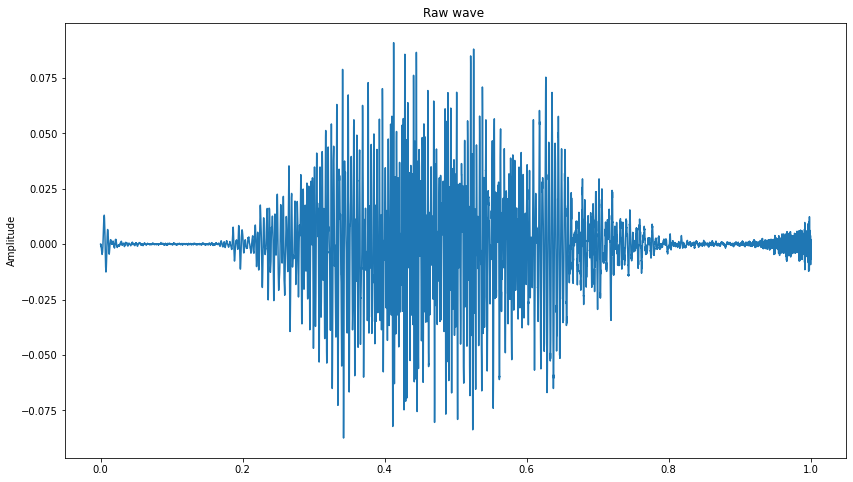

Higher frequencies  


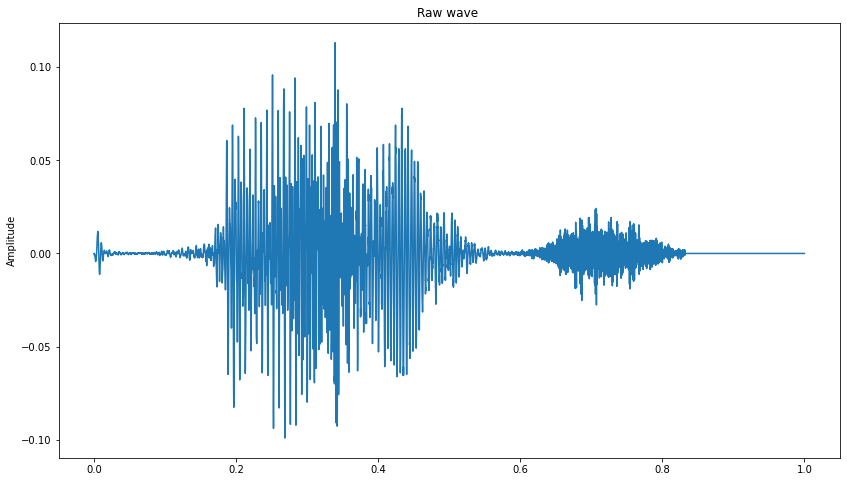

In [43]:
# stretching the sound
def stretch(data, rate=1):
    input_length = 16000
    data = librosa.effects.time_stretch(data, rate)
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")

    return data


data_stretch =stretch(data, 0.8)
print("This makes the sound deeper but we can still hear the word ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)

data_stretch =stretch(data, 1.2)
print("Higher frequencies  ")
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=16000)